In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Defining the System

In [2]:
L = 10  # Length of the ring
J = 1.0  # Interaction strength
k_B = 1.0  # Boltzmann constant
spin_values = np.array([-1, 1])  # Possible spin values
for i in range(L):
    j = (i + 1) % L  # Nearest neighbor index
    print(f"Spin {i} interacts with Spin {j}")

Spin 0 interacts with Spin 1
Spin 1 interacts with Spin 2
Spin 2 interacts with Spin 3
Spin 3 interacts with Spin 4
Spin 4 interacts with Spin 5
Spin 5 interacts with Spin 6
Spin 6 interacts with Spin 7
Spin 7 interacts with Spin 8
Spin 8 interacts with Spin 9
Spin 9 interacts with Spin 0


In [3]:
all_configs = list(itertools.product(spin_values, repeat=L))  # 1024 configs

In [4]:
all_configs = np.array(all_configs)
all_configs

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1,  1, -1],
       ...,
       [ 1,  1,  1, ...,  1, -1,  1],
       [ 1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1]], shape=(1024, 10))

# Define Energy and Magnetization Functions

In [5]:
def energy(config):
    """Calculate the energy of a given configuration."""
    E = 0
    for i in range(L):
        j = (i + 1) % L
        E += - J * config[i] * config[j]  # Interaction energy
    return E

In [6]:
def magnetization(config):
    """Calculate the magnetization of a given configuration."""
    return np.sum(config)

# Loop Over Temperatures

In [18]:
temps = np.linspace(0.1, 5.0, 50)  # Temperature range
energies = []
magnetizations = []
for T in temps:
    beta = 1 / T
    Z = np.sum(np.exp(-beta * energy(config)) for config in all_configs)  # Partition function
    avg_energy = np.sum(energy(config) * np.exp(-beta * energy(config)) for config in all_configs) / Z
    energies.append(avg_energy)
    avg_magnetization = np.sum(magnetization(config) * np.exp(-beta * energy(config)) for config in all_configs) / Z
    magnetizations.append(avg_magnetization)
    print(f"Temperature: {T}, Avg Energy: {avg_energy}, Avg Magnetization: {avg_magnetization}")


C:\Users\IISER13\AppData\Local\Temp\ipykernel_5636\4173023086.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  Z = np.sum(np.exp(-beta * energy(config)) for config in all_configs)  # Partition function
C:\Users\IISER13\AppData\Local\Temp\ipykernel_5636\4173023086.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  avg_energy = np.sum(energy(config) * np.exp(-beta * energy(config)) for config in all_configs) / Z
C:\Users\IISER13\AppData\Local\Temp\ipykernel_5636\4173023086.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  avg_magnetization = np.sum(magnetization(config) * np.exp(-beta

Temperature: 0.1, Avg Energy: -10.0, Avg Magnetization: 0.0
Temperature: 0.2, Avg Energy: -9.999999628992395, Avg Magnetization: 0.0
Temperature: 0.30000000000000004, Avg Energy: -9.999708489416667, Avg Magnetization: 0.0
Temperature: 0.4, Avg Energy: -9.991841221558888, Avg Magnetization: 0.0
Temperature: 0.5, Avg Energy: -9.940329754545768, Avg Magnetization: 0.0
Temperature: 0.6, Avg Energy: -9.78082619602425, Avg Magnetization: 0.0
Temperature: 0.7000000000000001, Avg Energy: -9.46807436542968, Avg Magnetization: 0.0
Temperature: 0.8, Avg Energy: -9.017467343727304, Avg Magnetization: 0.0
Temperature: 0.9, Avg Energy: -8.491659329953562, Avg Magnetization: 0.0
Temperature: 1.0, Avg Energy: -7.9556610894263615, Avg Magnetization: -3.4845709807158783e-16
Temperature: 1.1, Avg Energy: -7.449860039394646, Avg Magnetization: 0.0
Temperature: 1.2000000000000002, Avg Energy: -6.9901639002490015, Avg Magnetization: 0.0
Temperature: 1.3000000000000003, Avg Energy: -6.578182822923822, Avg Ma

# Results

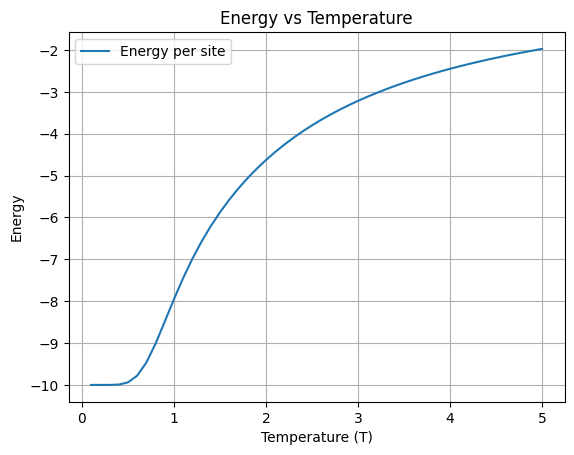

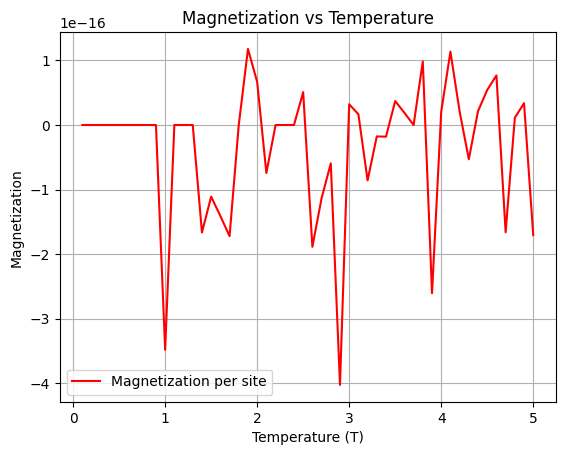

In [19]:
plt.figure()
plt.plot(temps, energies, label='Energy per site')
plt.xlabel('Temperature (T)')
plt.ylabel('Energy')
plt.title('Energy vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(temps, magnetizations, label='Magnetization per site', color='red')
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetization')
plt.title('Magnetization vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
print("# T    Energy    Magnetization")
for i in range(len(temps)):
    print(f"{temps[i]:.3f}  {energies[i]:.3f}    {magnetizations[i]} ")    

# T    Energy    Magnetization
0.100  -10.000    0.0 
0.200  -10.000    0.0 
0.300  -10.000    0.0 
0.400  -9.992    0.0 
0.500  -9.940    0.0 
0.600  -9.781    0.0 
0.700  -9.468    0.0 
0.800  -9.017    0.0 
0.900  -8.492    0.0 
1.000  -7.956    -3.4845709807158783e-16 
1.100  -7.450    0.0 
1.200  -6.990    0.0 
1.300  -6.578    0.0 
1.400  -6.210    -1.6652203862342147e-16 
1.500  -5.879    -1.1103477546861378e-16 
1.600  -5.580    -1.409780891401667e-16 
1.700  -5.309    -1.7222555432137477e-16 
1.800  -5.063    0.0 
1.900  -4.836    1.1790570128311538e-16 
2.000  -4.629    6.677235667927407e-17 
2.100  -4.437    -7.438270000486197e-17 
2.200  -4.260    0.0 
2.300  -4.096    0.0 
2.400  -3.943    0.0 
2.500  -3.801    5.091377697693834e-17 
2.600  -3.668    -1.8873660468570367e-16 
2.700  -3.544    -1.1353440968959146e-16 
2.800  -3.428    -5.944594326116953e-17 
2.900  -3.318    -4.027872068549883e-16 
3.000  -3.215    3.216920809717623e-17 
3.100  -3.119    1.664179634192448e-1